In [8]:
from numpy import *
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as scio
"""
函数说明：PCA算法实现
parameters:
    dataMat -用于进行PCA操作的数据集
    topNfeat -应用的N个特征
return:
    lowDataMat -将维后的数据集
    reconMat -重构的数据集（用于调试）
"""
def pca(dataMat, topNfeat = 9999999):
    meanVals = mean(dataMat, axis = 0)  #计算数据平均值
    meanRemoved = dataMat - meanVals    #去中心化
    covMat = cov(meanRemoved, rowvar = 0 ) #计算协方差
    #补充下面代码，按照注释的思路完成PCA的计算
    eigenvalues,eigenvectors=np.linalg.eig(covMat)  #计算协方差矩阵的特征值和特征向量
    
    eigenvaluessort_index=np.argsort(eigenvalues)
    #print(eigenvalues,eigenvectors, eigenvaluessort_index)#对特征值从小到大排序，并提取对应的index   
    topk_eigenvectors=eigenvectors[:,eigenvaluessort_index[:-topNfeat-1:-1]]#对特征排序结果逆序，并保留topNfeat的index,根据特征值排序结果得到topNfeat个最大的特征向量
    #print(topk_eigenvectors)
    lowDataMat=np.dot(meanRemoved,topk_eigenvectors)    #数据降维
    #print(lowDataMat)
#     print(meanRemoved)
#     print(topk_eigenvectors)
    lowDataMat=np.dot(lowDataMat,topk_eigenvectors.T) 
    reconMat=lowDataMat+meanVals                      #降维后的数据重构（对比上面的计算公式，注意前面有去中心化操作，需要恢复）
    return lowDataMat, reconMat, eigenvalues
"""
函数说明：绘制数据集
parameters:
    dataMat -原始数据集
    reconMat -重构数据集
return:
    None
"""
def drawDataSet(dataMat, reconMat):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(dataMat[:,0].flatten(), dataMat[:,1].flatten(), marker='*',s=90,c='green')
    ax.scatter(reconMat[:,0].flatten(), reconMat[:,1].flatten(), marker='o',s=30,c='red')
    plt.show()
 


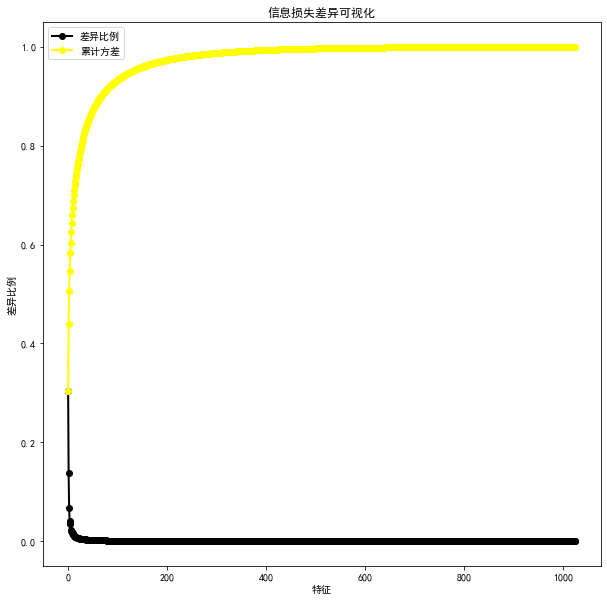

In [9]:
dataFile = 'data3.mat'
data = scio.loadmat(dataFile)  # 读取文件
dataMat = data["X"]
lowDMat, reconMat, eigenvalues = pca(dataMat,1)
#1. 计算每个特征解释的方差的比例
sum_eigenvalues = np.sum(eigenvalues)
prop_var = [i/sum_eigenvalues for i in eigenvalues]
# print(prop_var)
#2. 计算累积方差
cum_var = [np.sum(prop_var[:i+1]) for i in range(len(prop_var))]
x_labels = [i+1 for i in range(len(prop_var))]# 读取每一维的特征
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.figure(figsize=(10, 10))
plt.plot(x_labels, prop_var, marker='o', markersize=6, color='black', linewidth=2, label='差异比例')
plt.plot(x_labels, cum_var, marker='o', color='yellow', linewidth=2, label="累计方差")
plt.legend()
plt.title('信息损失差异可视化')
plt.xlabel('特征')
plt.ylabel('差异比例')
plt.show()

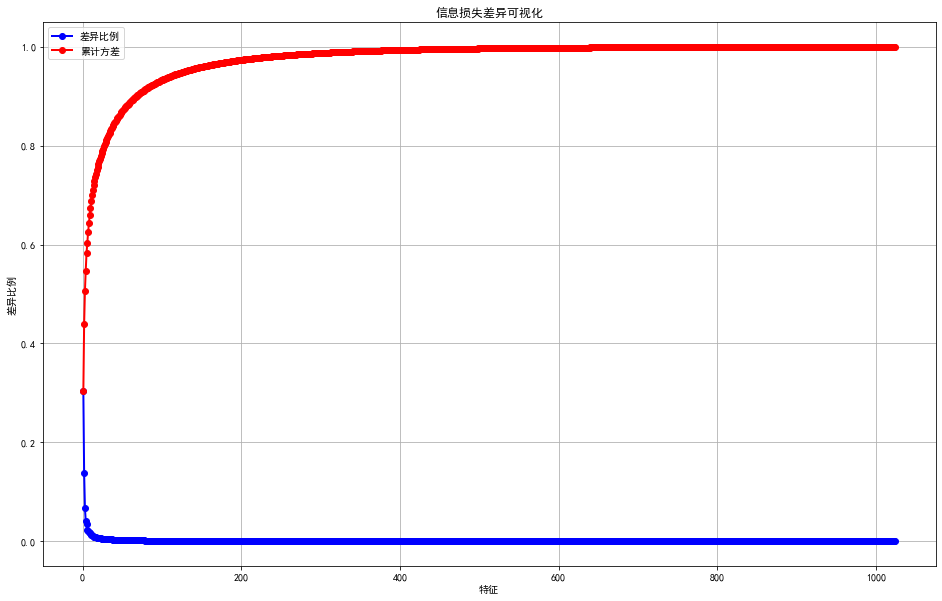

In [11]:
dataFile = 'data3.mat'
data = scio.loadmat(dataFile)  # 读取文件
dataMat = data["X"]
lowDMat, reconMat, eigenvalues = pca(dataMat,1)
#1. 计算每个特征解释的方差的比例
sum_eigenvalues = np.sum(eigenvalues)
prop_var = [i/sum_eigenvalues for i in eigenvalues]
# print(prop_var)
#2. 计算累积方差
cum_var = [np.sum(prop_var[:i+1]) for i in range(len(prop_var))]
x_labels = [i+1 for i in range(len(prop_var))]  # 读取每一维的特征
plt.rcParams['font.sans-serif']='SimHei'
plt.figure(figsize=(16, 10))
plt.plot(x_labels, prop_var, marker='o', markersize=6, color='blue', linewidth=2, label='差异比例')
plt.plot(x_labels, cum_var, marker='o', color='red', linewidth=2, label="累计方差")
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.legend()
plt.grid()
plt.title('信息损失差异可视化')
plt.xlabel('特征')
plt.ylabel('差异比例')
plt.show()